# LOAN APPROVAL PREDICTION

Through the following notebook, you will be tasked with performing some basic data handling, exploration, and analysis. This process should include **loading the data**, **identifying and handling missing values**, **data Exploratory** and **Model Building**.

---

The project, and this notebook, is divided into multiple tasks and subtasks, which should be followed in order:

- [Preparation](#Preparation)
    - [Importing](#Importing)
    - [Task 1: Data Overview and Cleaning 
- [Data Exploratory]
    - [Task 2: Visulaisation
- [Model Building]
    - [Task 3: KNN
    - [Task 4: RandomForestClassifier
- [Model Evaluation and validation]
    - [Task 5: feature Importance
    - [Task 6: Shap

 ## Preparation and importing packages 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the Dataset
dataset_location = 'https://raw.githubusercontent.com/no37no37/Loan_Approval_Prediction_ML_Model/refs/heads/main/loan_approval_dataset.csv'
df = pd.read_csv(dataset_location) # creates a data frame from the dataset location specified using the pandas package

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Summary of numerical and categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Data preprocessing and Cleaning 

In [6]:
df.shape

(4269, 13)

In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [69]:
# Check for missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### No missing values were found in this dataset

## Data Exploratory and Visualization
Visualize relationships and distributions:

**Target Variable Distribution:**

In [70]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [71]:
df.columns = df.columns.str.strip()

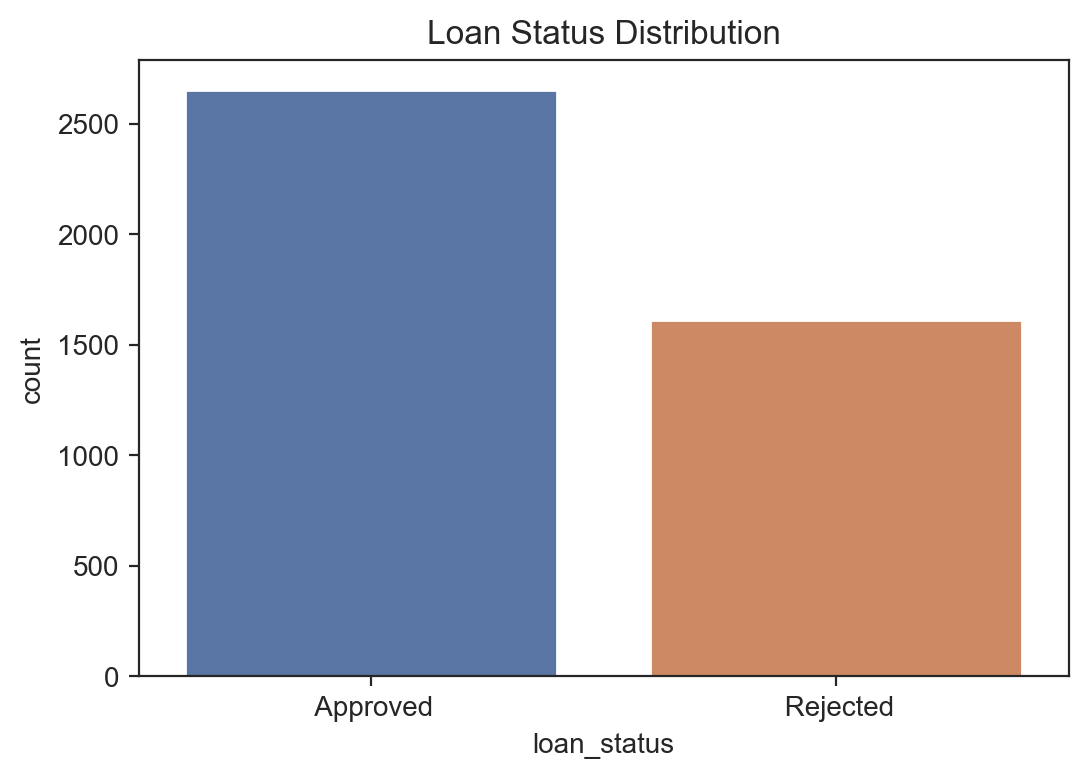

In [72]:
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()


In [73]:
# (2) frequency distribution table
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [74]:
# (3) relative frequency distribution (0-1)
df['loan_status'].value_counts(normalize=True)

loan_status
 Approved    0.62216
 Rejected    0.37784
Name: proportion, dtype: float64

## EDA: Feature/Class Relationships

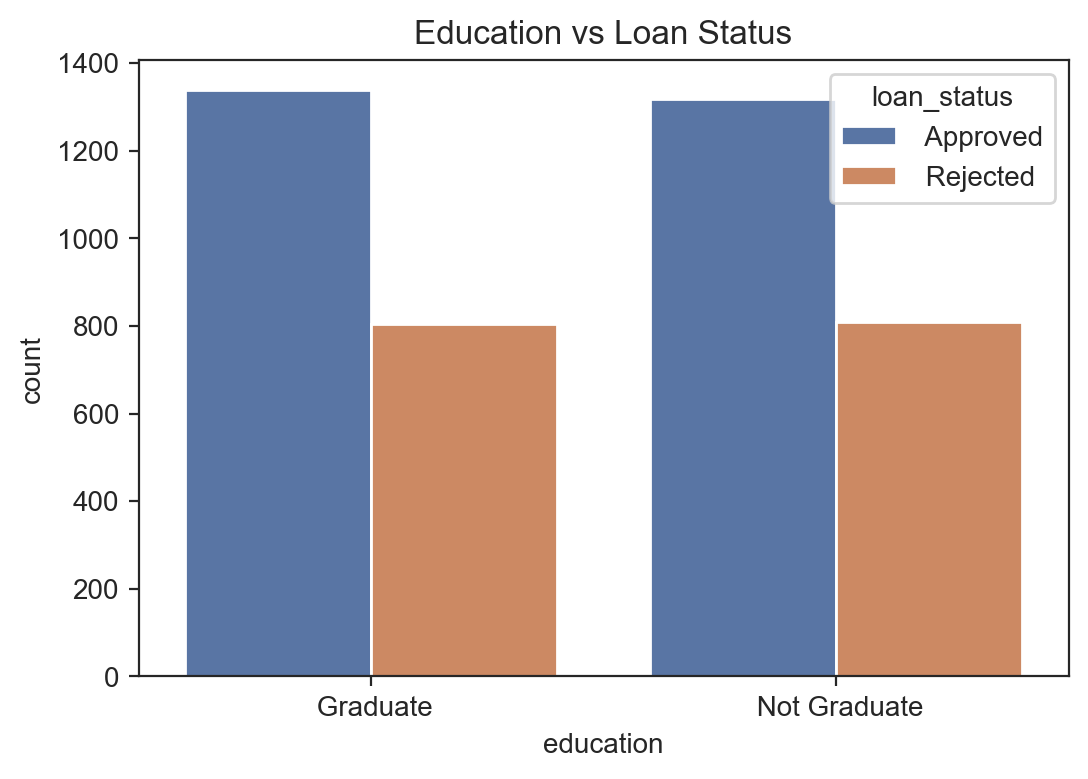

In [75]:
sns.countplot(data=df, x='education', hue='loan_status')
plt.title('Education vs Loan Status')
plt.show()


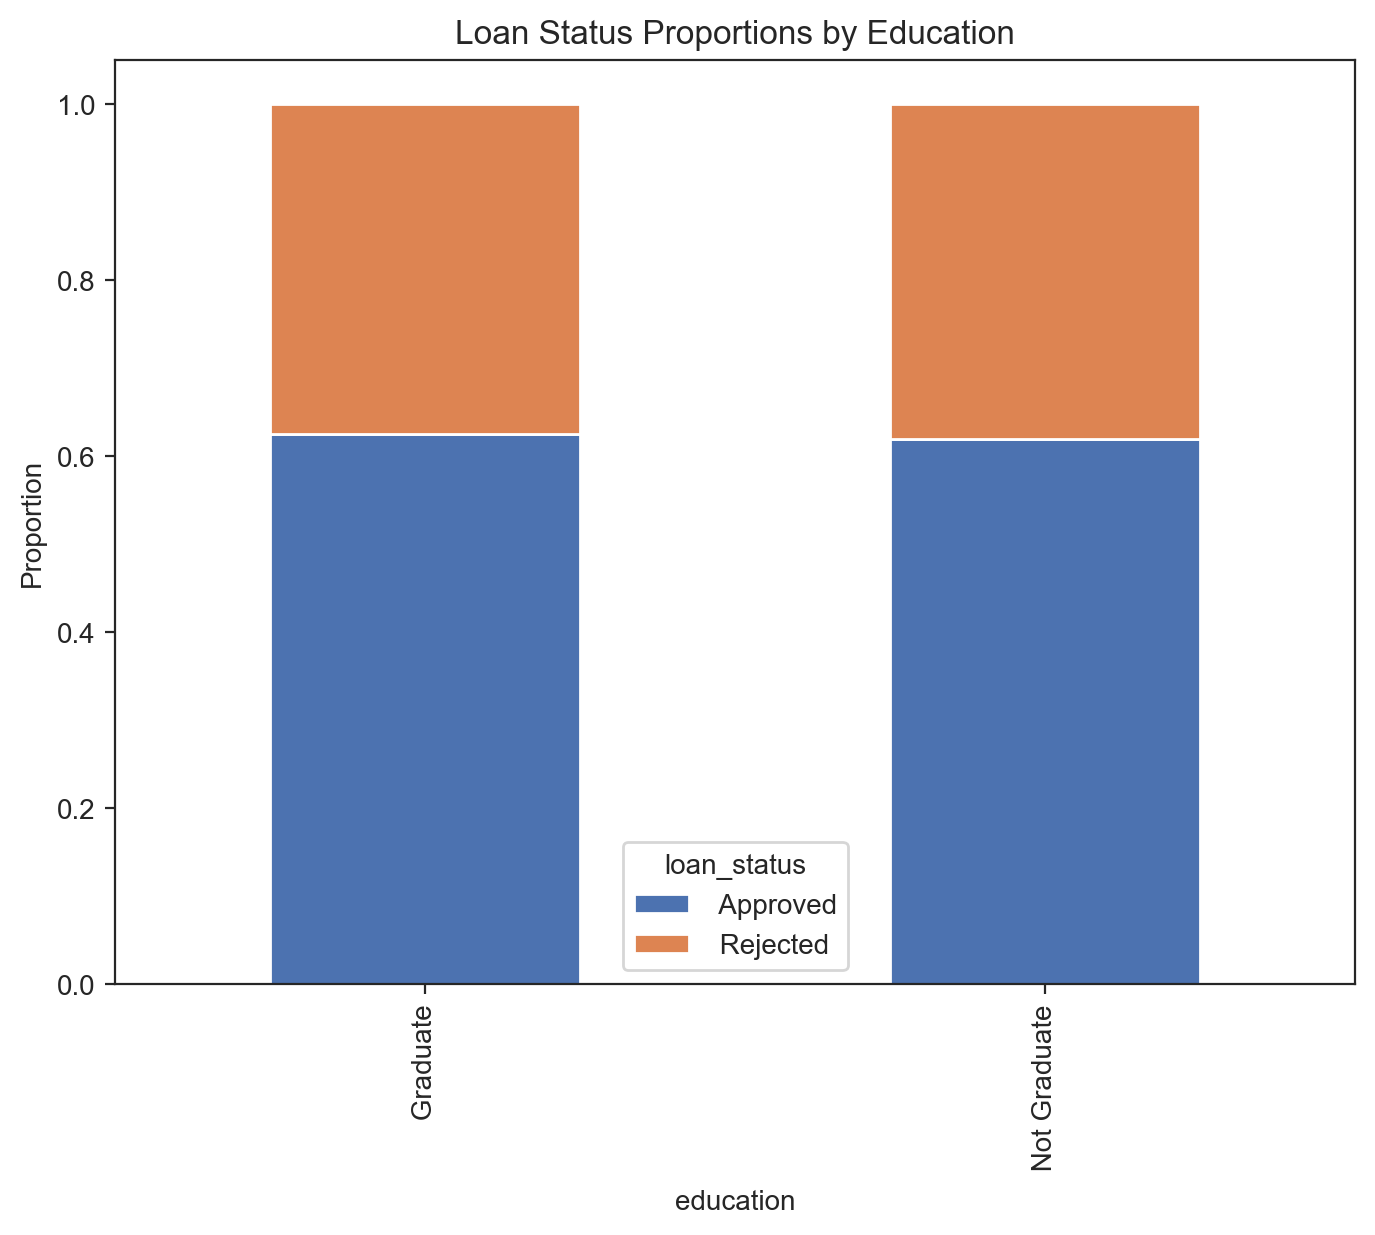

In [76]:
education_counts = df.groupby(['education', 'loan_status']).size().unstack()
education_percent = education_counts.div(education_counts.sum(axis=1), axis=0)
education_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status Proportions by Education')
plt.ylabel('Proportion')
plt.show()


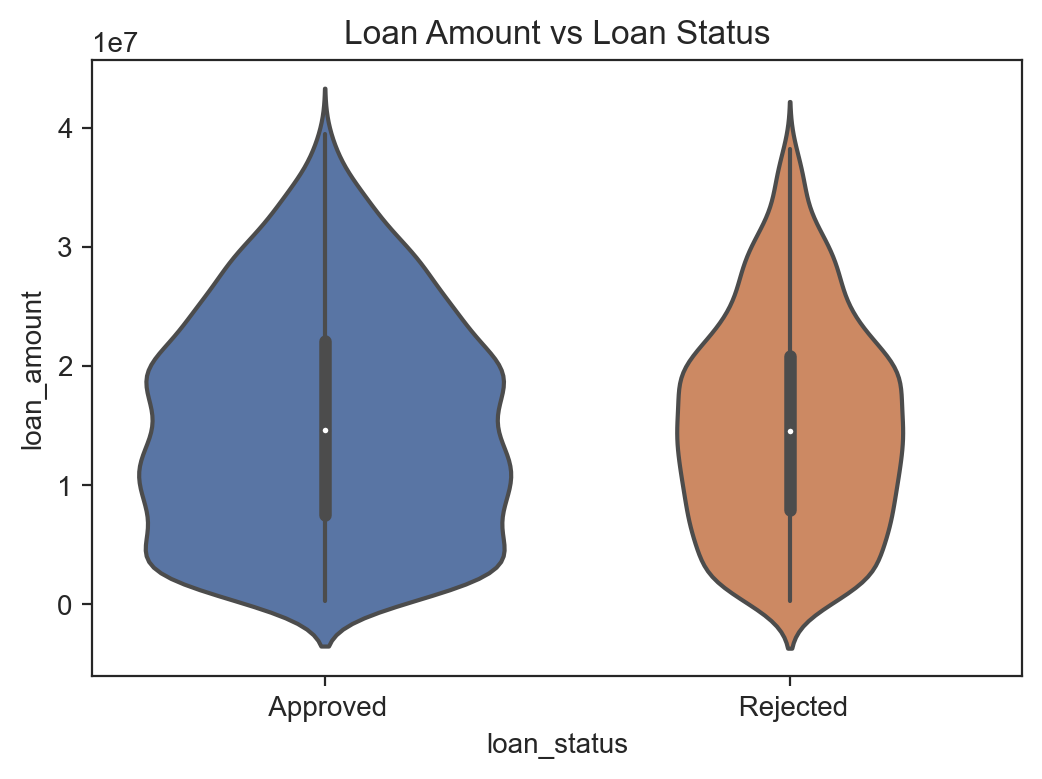

In [77]:
sns.violinplot(data=df, x='loan_status', y='loan_amount', scale='count')
plt.title('Loan Amount vs Loan Status')
plt.show()


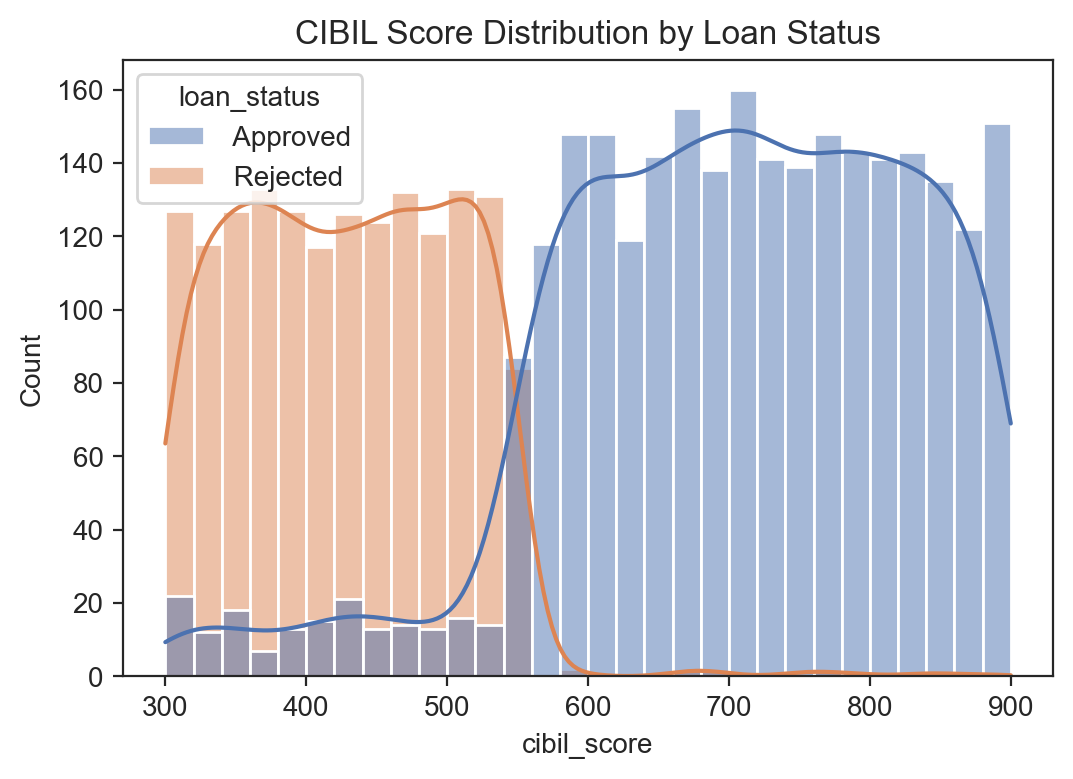

In [78]:
sns.histplot(data=df, x='cibil_score', hue='loan_status', kde=True, bins=30)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()


# Feature Distributions:

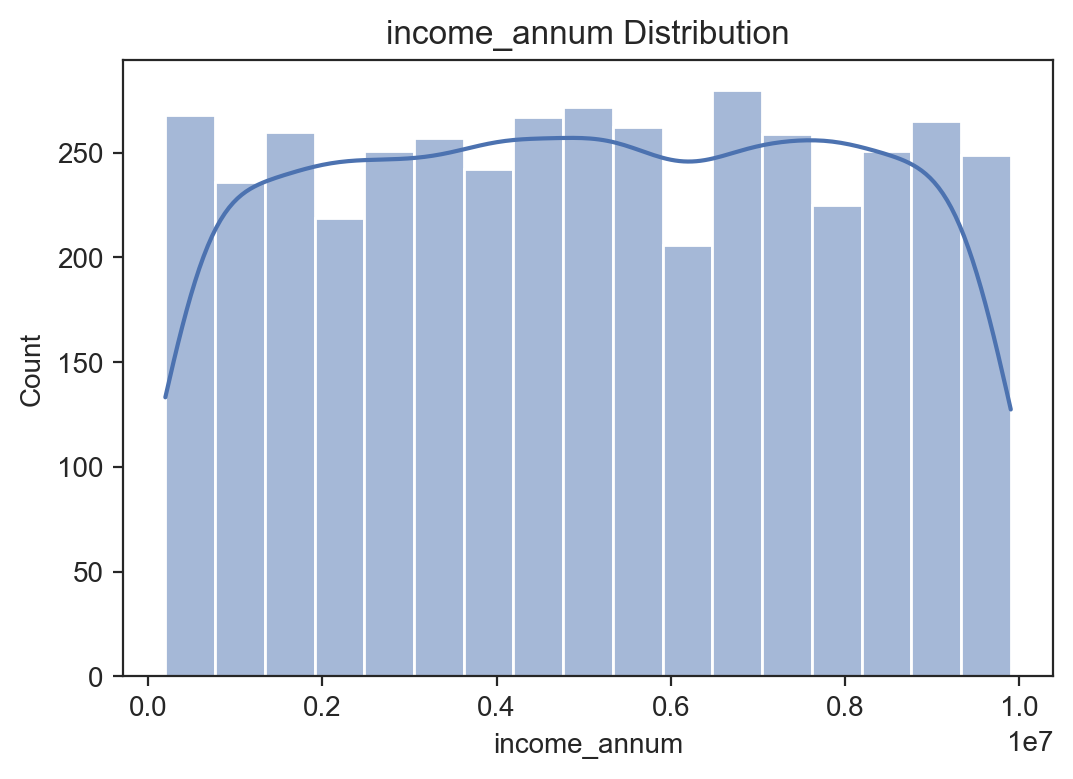

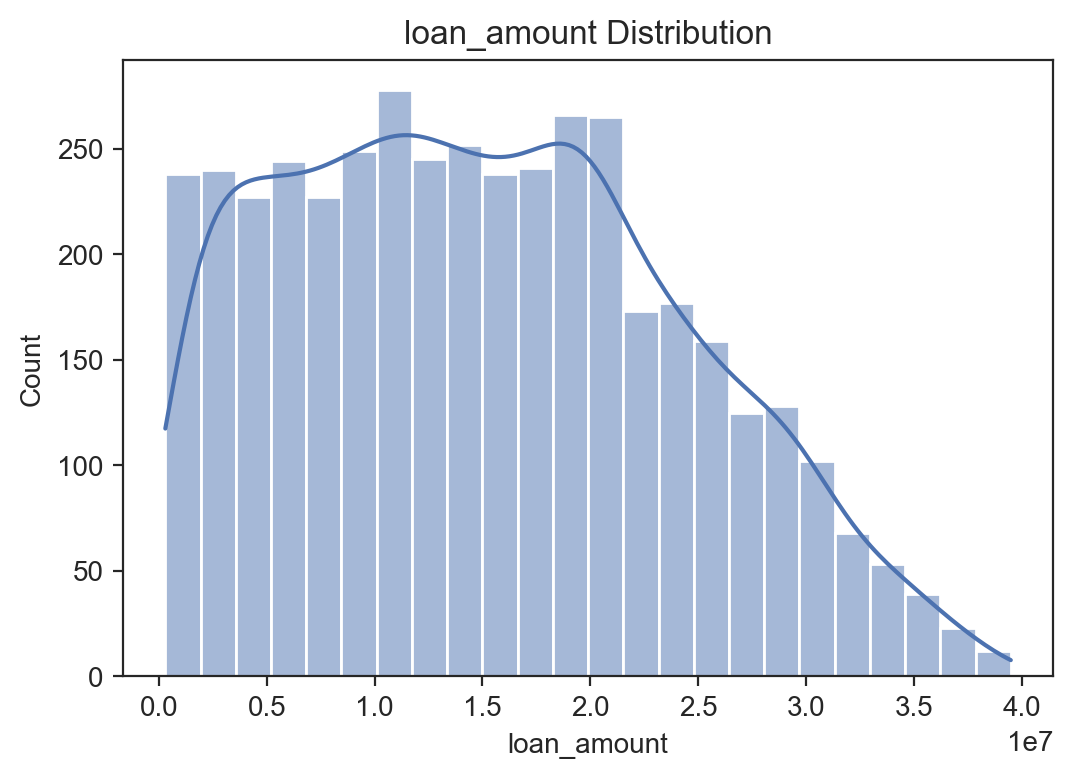

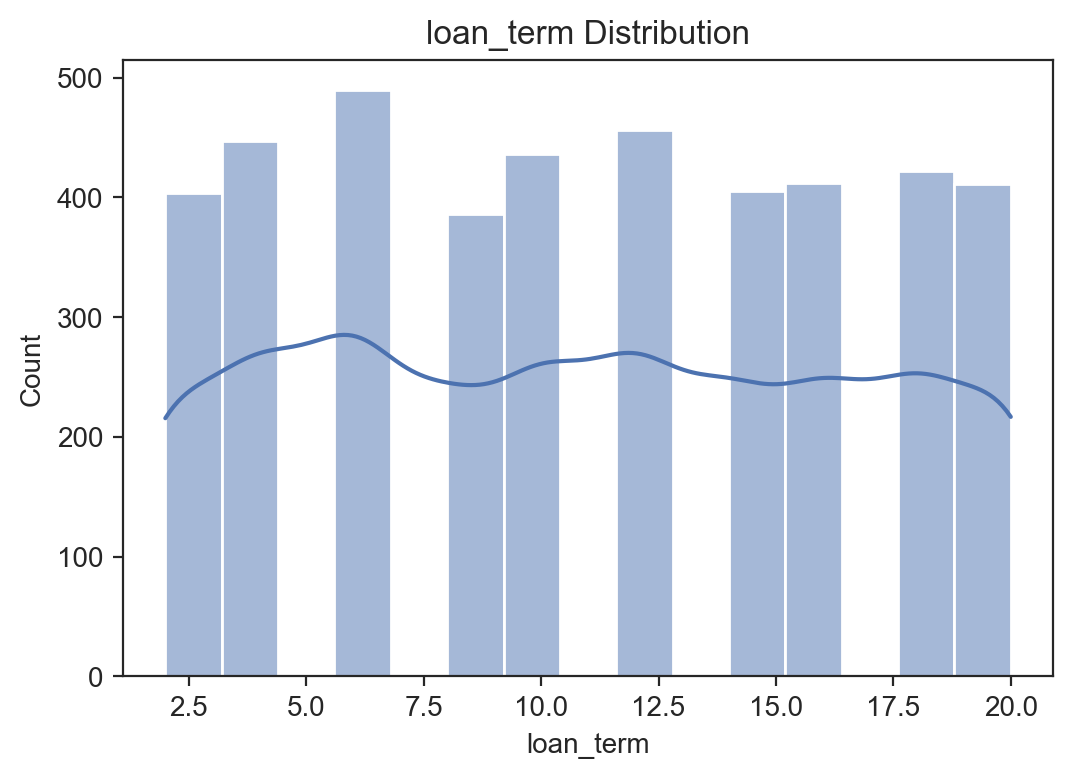

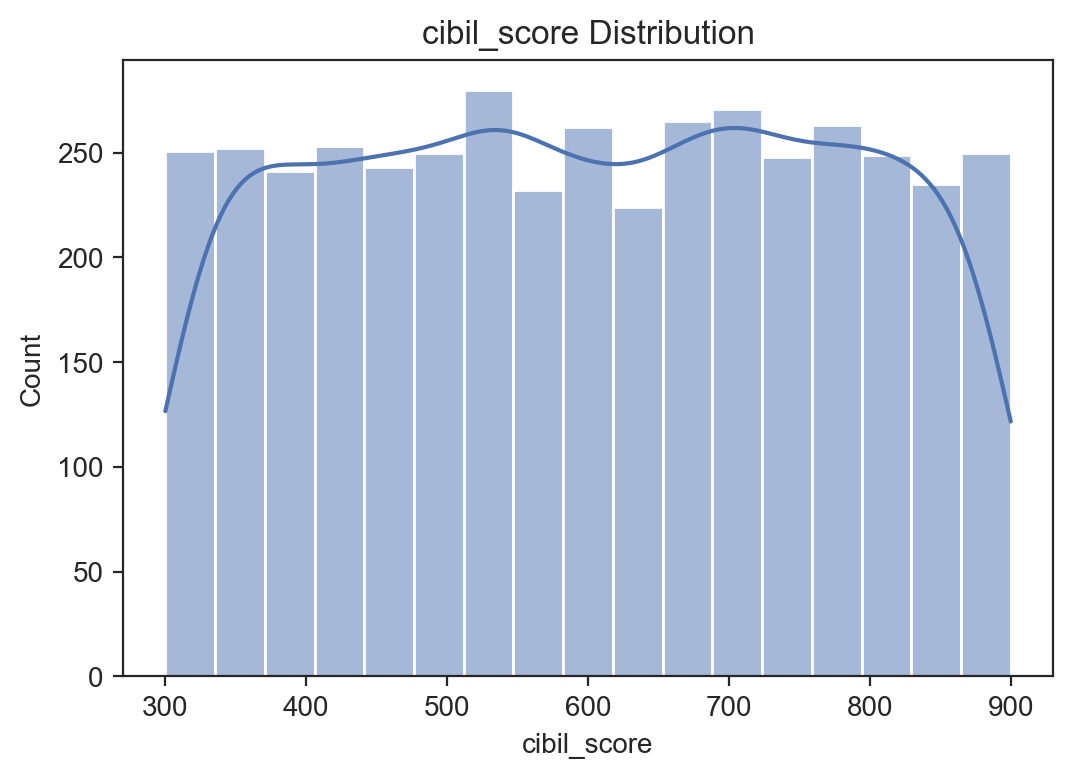

In [79]:
numeric_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


## Categorical vs. Target:

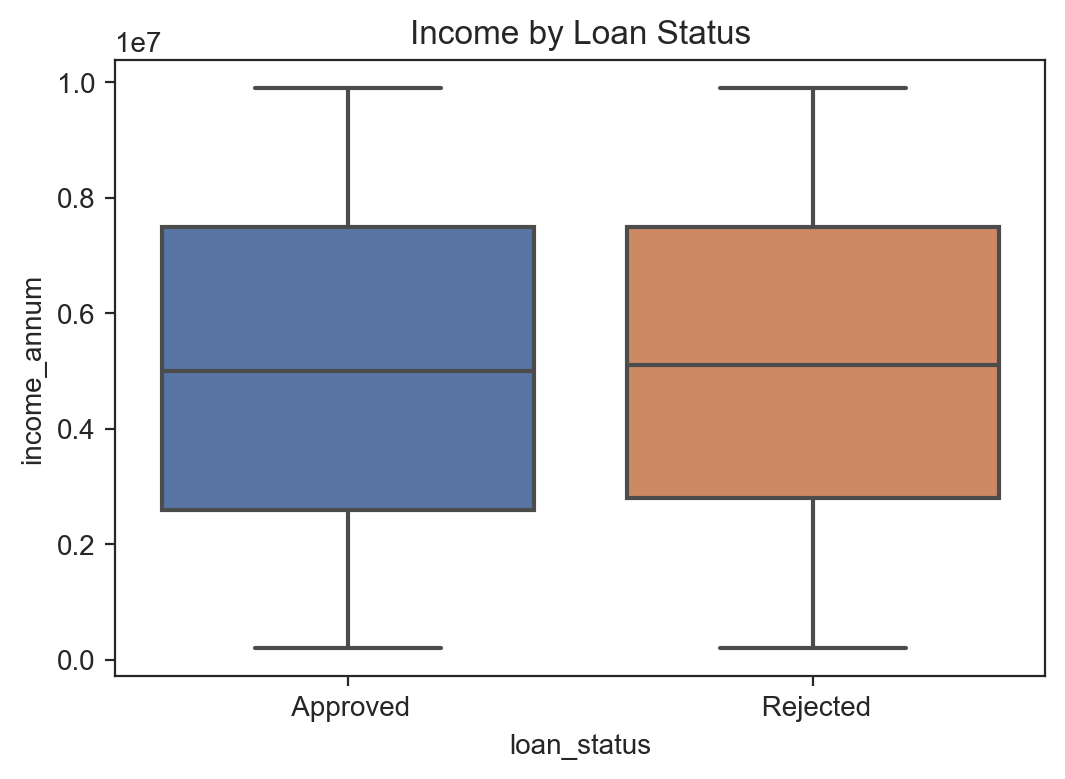

In [80]:
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('Income by Loan Status')
plt.show()


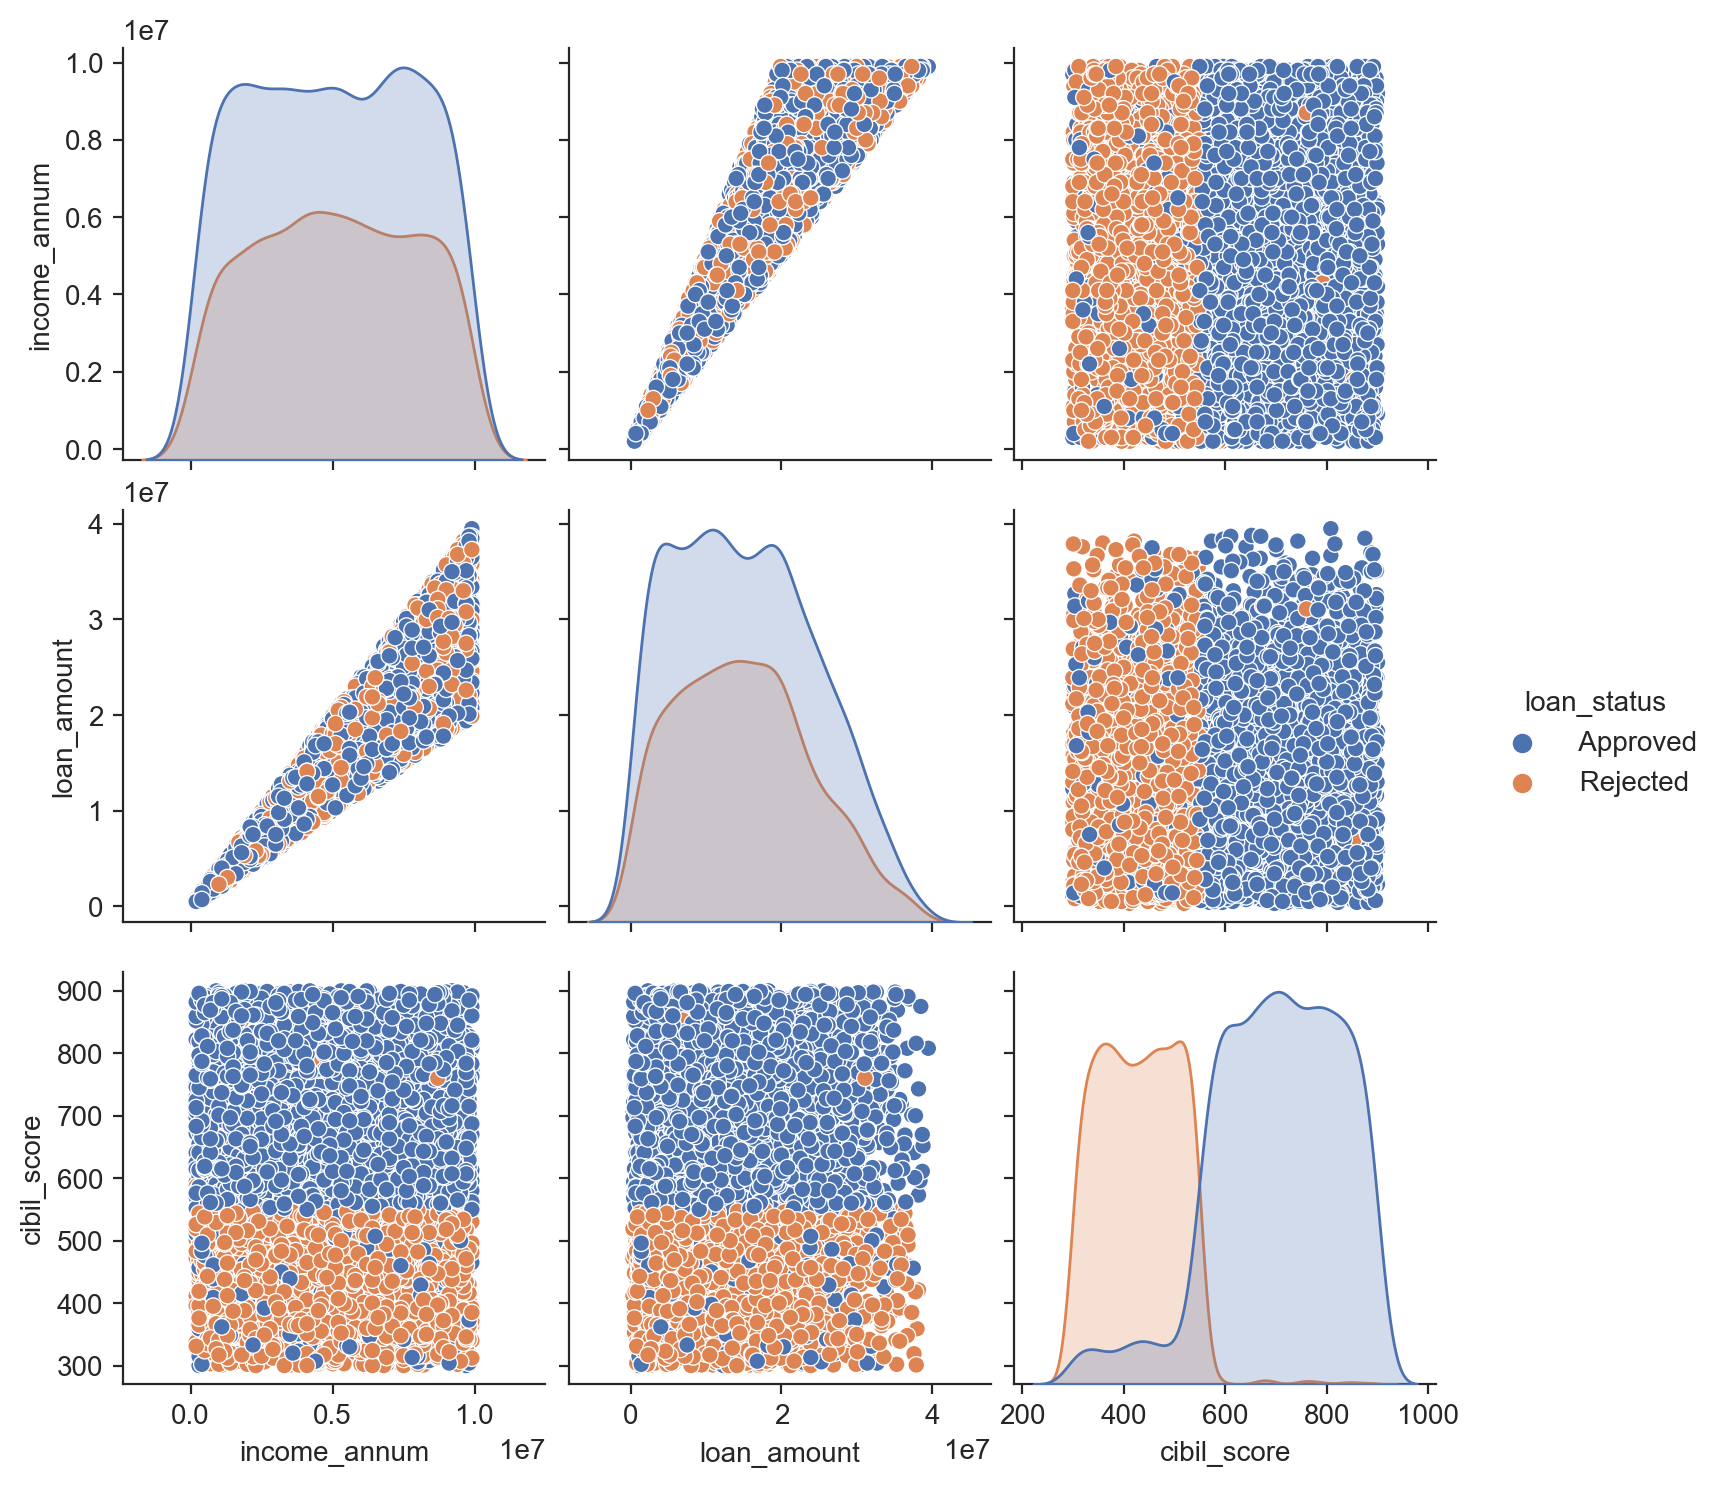

In [81]:
sns.pairplot(df, hue='loan_status', vars=['income_annum', 'loan_amount', 'cibil_score'])
plt.show()


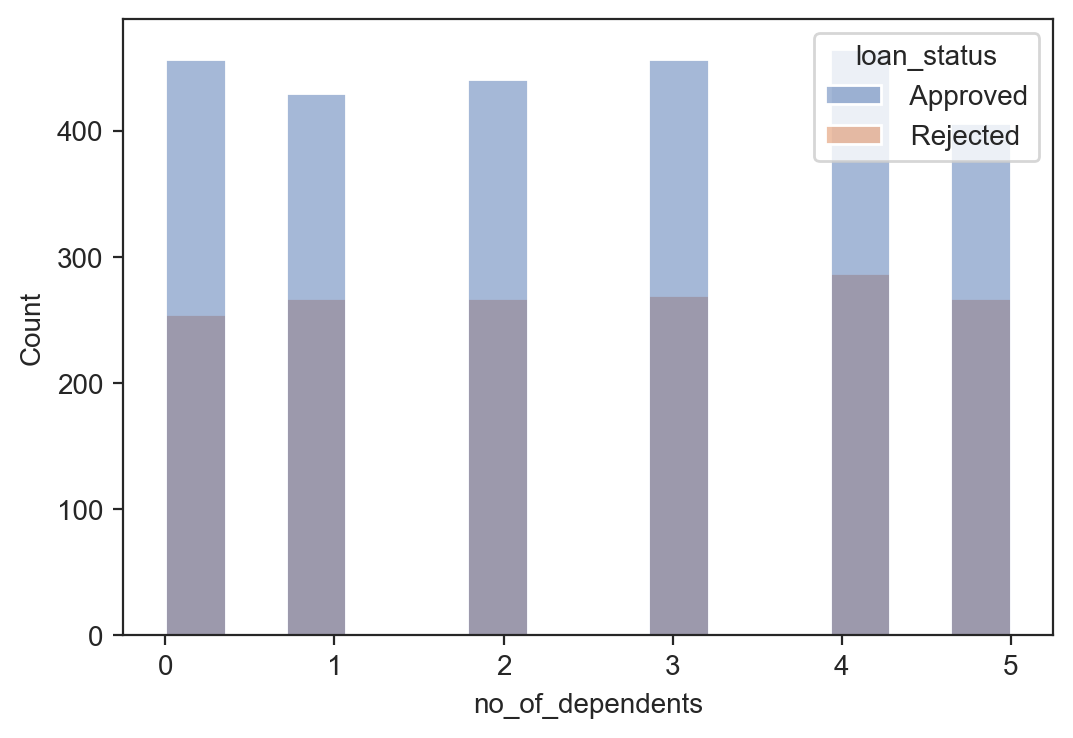

In [82]:
# a histogram; one KDE for each group
sns.histplot(
    data=df, x='no_of_dependents', hue='loan_status',
   
);

In [83]:
pivot_table = df.pivot_table(values=['income_annum', 'loan_amount', 'cibil_score'],
                             index='loan_status', aggfunc='mean')
print(pivot_table)


             cibil_score  income_annum   loan_amount
loan_status                                         
 Approved     703.461973  5.025904e+06  1.524725e+07
 Rejected     429.468072  5.113825e+06  1.494606e+07


In [84]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Get unique values again
unique_dependents = df['no_of_dependents'].unique()
print("Unique values in 'no_of_dependents':", unique_dependents)


Unique values in 'no_of_dependents': [2 0 3 5 4 1]


#  Model development and selection
## Classification
Build and evaluate models:

Train/Test Split:

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['education'] = encoder.fit_transform(df['education'])
df['loan_status'] = encoder.fit_transform(df['loan_status'])


In [90]:
# Define the features and target
X = df.drop('loan_status', axis=1)  # Dropping 'loan_status' column to use other columns as features
y = df['loan_status']  # Defining the target as 'loan_status'


In [91]:
# Check for missing values
print(X.isnull().sum())

# Drop rows with missing values if any
X = X.dropna()
y = y.dropna()


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64


In [92]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Display the shapes of the split datasets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(3201, 12) (3201,) (1068, 12) (1068,)


In [96]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Encode categorical columns
X_train['education'] = encoder.fit_transform(X_train['education'])
X_test['education'] = encoder.transform(X_test['education'])

X_train['self_employed'] = encoder.fit_transform(X_train['self_employed'])
X_test['self_employed'] = encoder.transform(X_test['self_employed'])


## KNeighborsClassifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.5552434456928839


In [98]:
from sklearn.metrics import classification_report

# Get classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.72      0.67       659
           1       0.39      0.29      0.33       409

    accuracy                           0.56      1068
   macro avg       0.51      0.50      0.50      1068
weighted avg       0.53      0.56      0.54      1068



In [ ]:


# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))


## Random ForestClassifier

In [100]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


## Model Evaluation and Validation

In [102]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9822

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       659
           1       0.98      0.98      0.98       409

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068


Confusion Matrix:
[[649  10]
 [  9 400]]


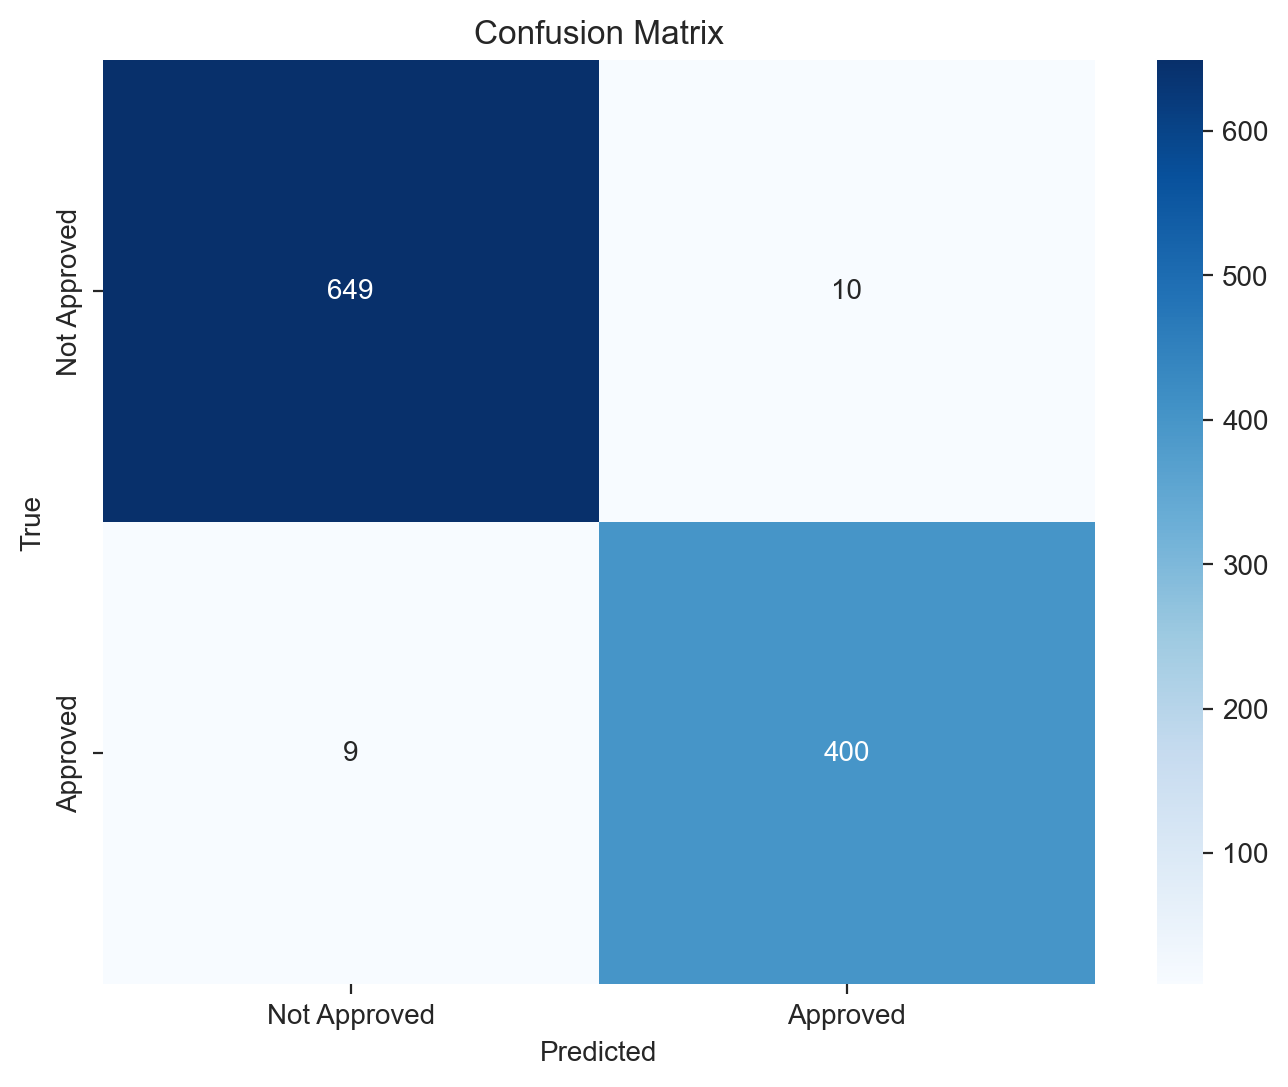

In [107]:
 ##Plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Feature Importance 

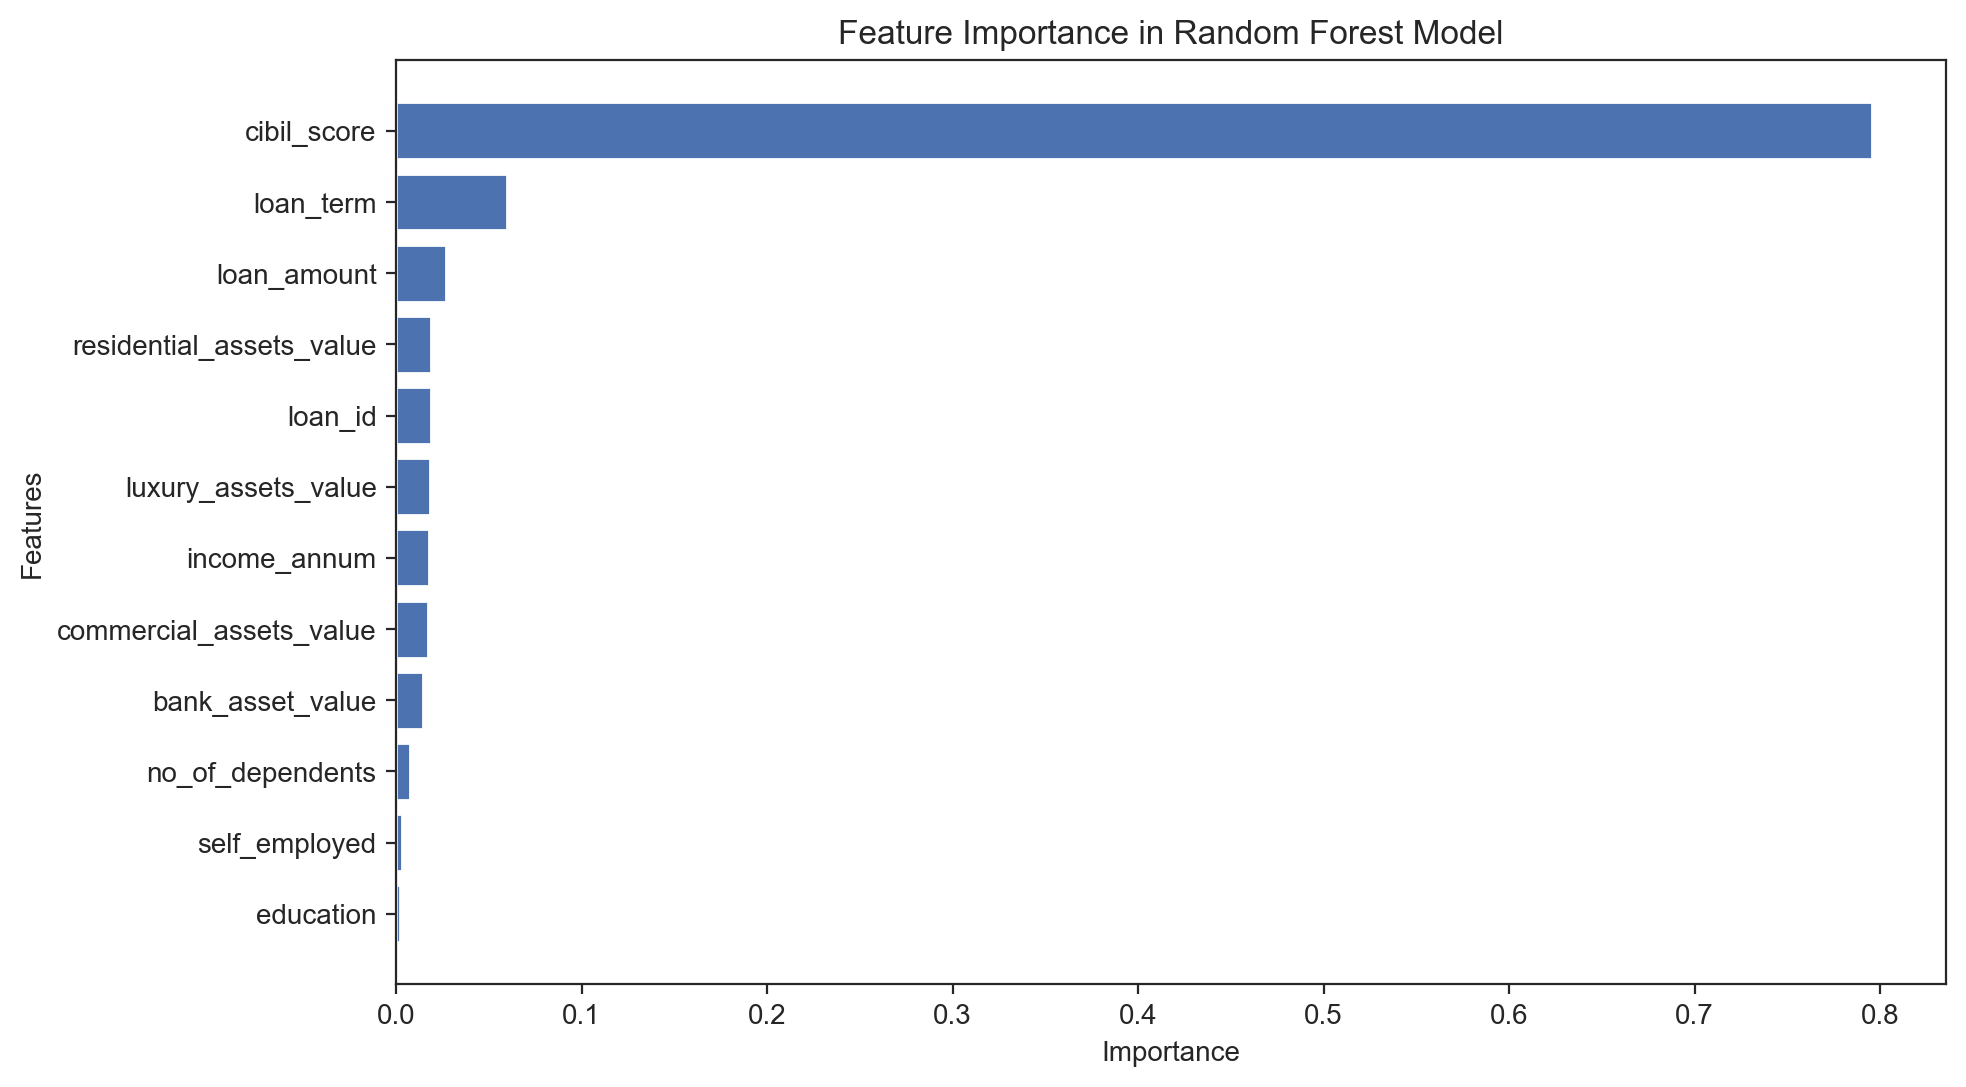

In [103]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## Insight from the graph
from the feature important graph it can be seen that cibil score , loan term and loan amount are the most important features

pip install shap


## Shap

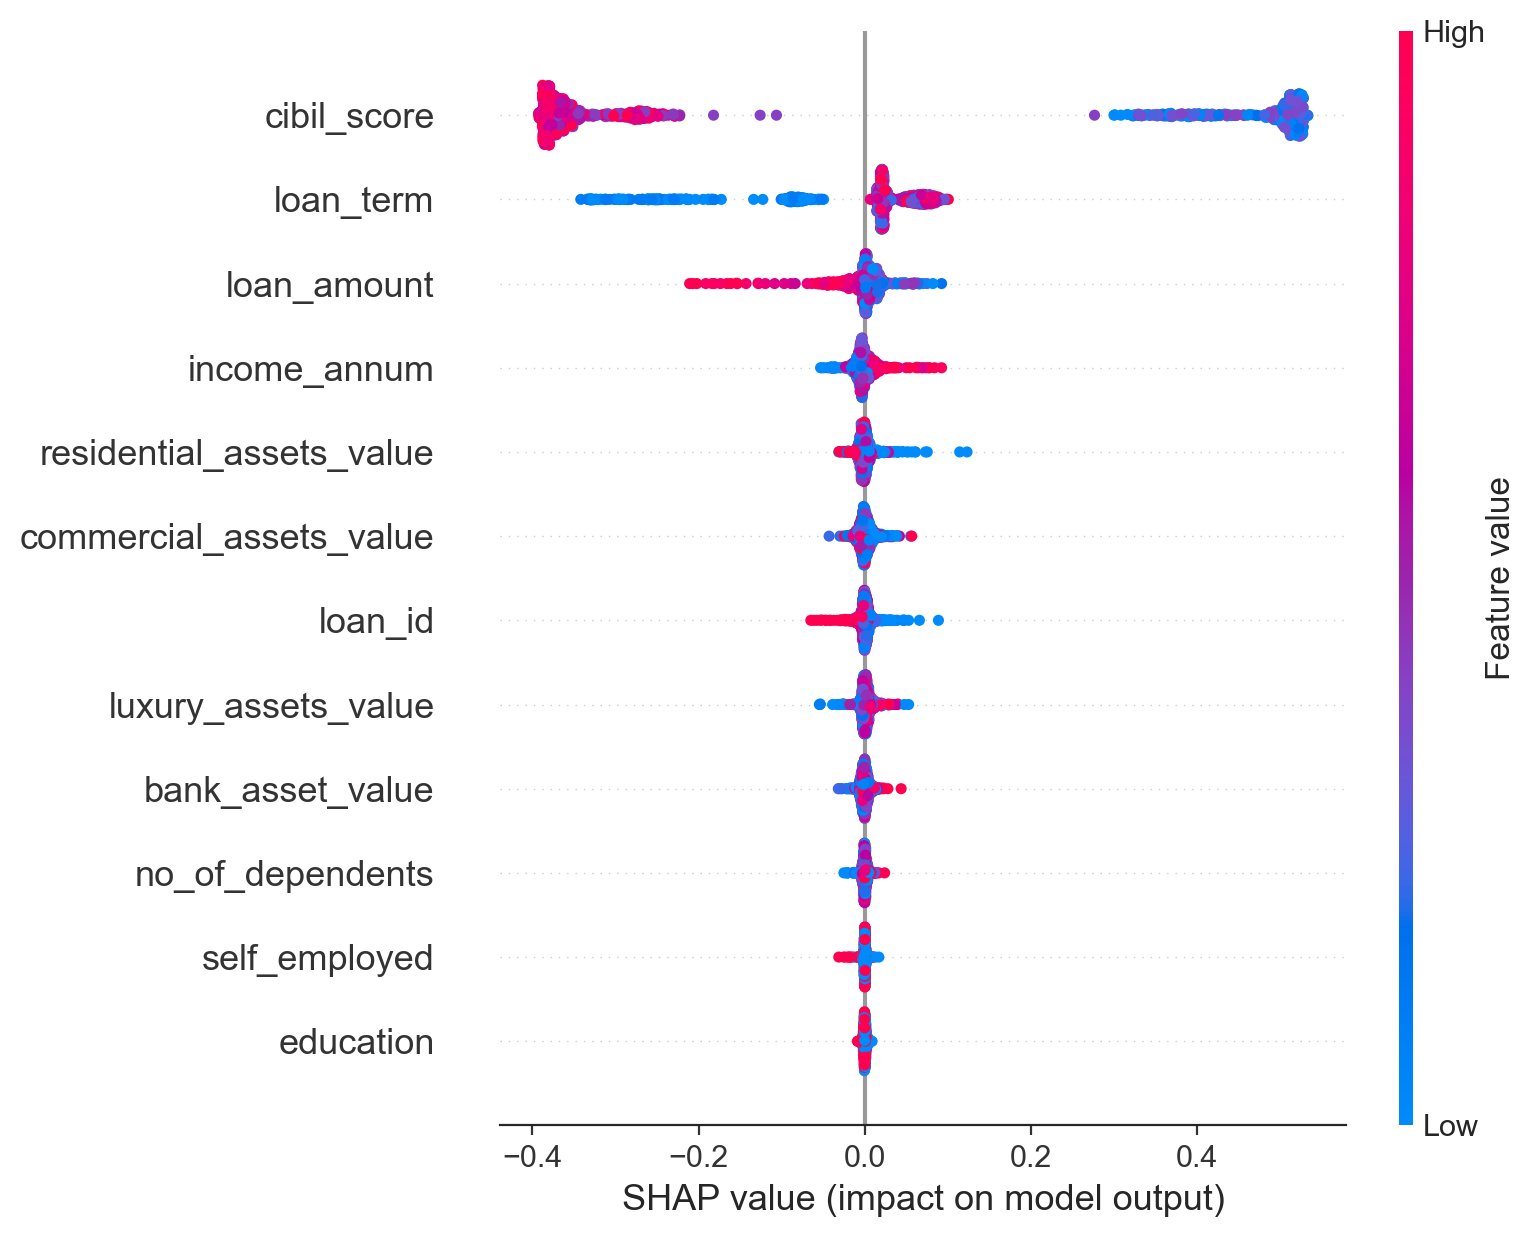

In [111]:
# 1. SHAP values: Use the tree explainer for random forests
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# 2. Summary Plot: Visualize feature importance across all predictions
shap.summary_plot(shap_values[1], X_test)



In [114]:
# 3. Force Plot: Visualize SHAP values for a single prediction
shap.initjs()  # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])



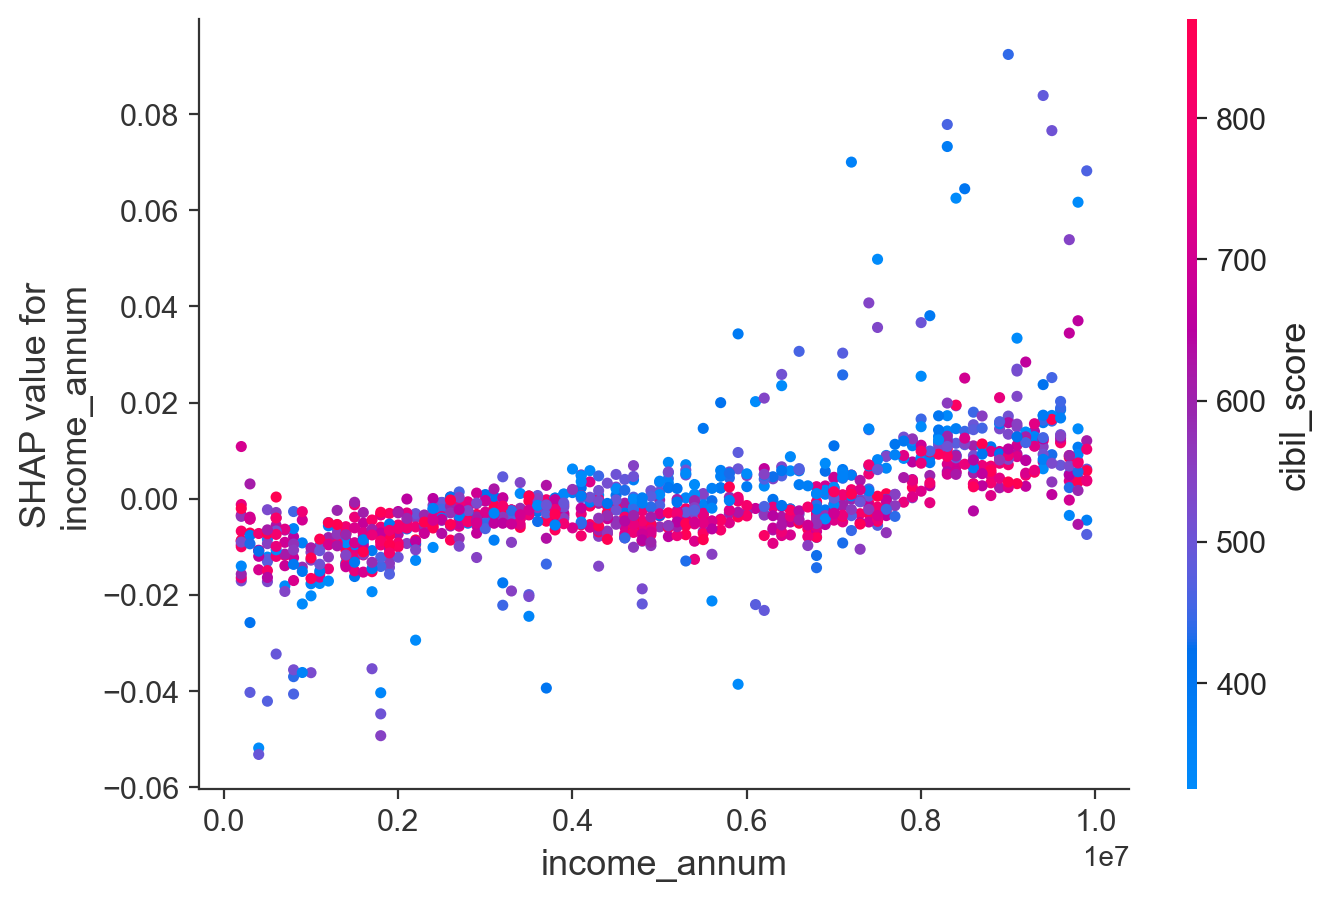

In [115]:
# 4. Dependence Plot: Visualize how a single feature affects the output
shap.dependence_plot("income_annum", shap_values[1], X_test)